# Average book rating

Using the provided dataset, you are asked to train a model that predicts the average book rating.

Attributes information:

    1) bookID: A unique identification number for each book.

    2) title: The name under which the book was published.

    3) authors: The names of the authors of the book. Multiple authors are delimited by “/”.

    4) average_rating: The average rating of the book received in total.

    5) isbn: Another unique number to identify the book, known as the International Standard Book Number.

    6) isbn13: A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN.

    7) language_code: Indicates the primary language of the book. For instance, “eng” is standard for English.

    8) num_pages: The number of pages the book contains.

    9) ratings_count: The total number of ratings the book received.

    10) text_reviews_count: The total number of written text reviews the book received.

    11) publication_date: The date the book was published.

    12) publisher: The name of the book publisher.

In [47]:
import pandas as pd
import numpy as np

from datetime import datetime, date, time

import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
#!pip install lazypredict
#!pip install pandas_profiling
#!pip install ipywidgets

In [49]:
books_df = pd.read_csv("books.csv", index_col="bookID", sep=',') #, error_bad_lines=False) #lineterminator='\n')#

# line 3350
#12224,Streetcar Suburbs: The Process of Growth in Boston  1870-1900,Sam Bass Warner, Jr./Sam B. Warner,3.58,0674842111,9780674842113,en-US,236,61,6,4/20/2004,Harvard University Press
#12224,Streetcar Suburbs: The Process of Growth in Boston  1870-1900,Sam Bass Warner Jr./Sam B. Warner,3.58,0674842111,9780674842113,en-US,236,61,6,4/20/2004,Harvard University Press

# line 4704
# 16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net, one of the founding members of this Tolkien website)/Verlyn Flieger/Turgon (=David E. Smith),3.58,1593600119,9781593600112,eng,400,26,4,4/6/2004,Cold Spring Press
# 16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net one of the founding members of this Tolkien website)/Verlyn Flieger/Turgon (=David E. Smith),3.58,1593600119,9781593600112,eng,400,26,4,4/6/2004,Cold Spring Press

# line 5879
# 22128,Patriots (The Coming Collapse),James Wesley, Rawles,3.63,156384155X,9781563841552,eng,342,38,4,1/15/1999,Huntington House Publishers
# 22128,Patriots (The Coming Collapse),James Wesley Rawles,3.63,156384155X,9781563841552,eng,342,38,4,1/15/1999,Huntington House Publishers

# line 8981
# 34889,Brown's Star Atlas: Showing All The Bright Stars With Full Instructions How To Find And Use Them For Navigational Purposes And Department Of Trade Examinations.,Brown, Son & Ferguson,0.00,0851742718,9780851742717,eng,49,0,0,5/1/1977,Brown Son & Ferguson Ltd.
# 34889,Brown's Star Atlas: Showing All The Bright Stars With Full Instructions How To Find And Use Them For Navigational Purposes And Department Of Trade Examinations.,Brown/ Son & Ferguson,0.00,0851742718,9780851742717,eng,49,0,0,5/1/1977,Brown Son & Ferguson Ltd.

In [50]:
books_df.columns

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [51]:
# fix column name
books_df.rename(columns = {'  num_pages':'num_pages'}, inplace = True)

In [52]:
books_df.shape

(11127, 11)

In [53]:
books_df.head(n=3)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic


# Data Exploratory Analysis

This analysis includes:
- Datatypes convertion
- Null Values
- Analysis of balanced data on average rating column
- Pandas profile report
- Outliers
- Categorical columns


In [54]:
books_df.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498
std,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000
75%,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000
max,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [55]:
books_df.describe(exclude=[np.number]) # categorical variables

,title,authors,isbn,language_code,publication_date,publisher
count,11127,11127,11127,11127,11127,11127
unique,10352,6643,11127,27,3679,2292
top,The Brothers Karamazov,Stephen King,0439785960,eng,10/1/2005,Vintage
freq,9,40,1,8911,56,318


In [56]:
books_df.dtypes

title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

### Data type convertion

In [57]:
# 2 errors on publication date
# books_df.loc[(books_df['publication_date'] == '11/31/2000') | (books_df['publication_date'] == '6/31/1982')]

In [58]:
# publication date corrections

books_df.loc[(books_df['publication_date'] == '11/31/2000'), 'publication_date'] = '11/30/2000' # September 1st 1999
books_df.loc[(books_df['publication_date'] == '6/31/1982'), 'publication_date'] = '6/01/1982' # Amazon

# convert publication date as datetime type, needed to create future bookAge feature
books_df['publication_date'] = pd.to_datetime(books_df.publication_date) 

In [59]:
books_df.dtypes

title                         object
authors                       object
average_rating               float64
isbn                          object
isbn13                         int64
language_code                 object
num_pages                      int64
ratings_count                  int64
text_reviews_count             int64
publication_date      datetime64[ns]
publisher                     object
dtype: object

### Null values?

In [60]:
books_df.isna().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

### Is data balanced?

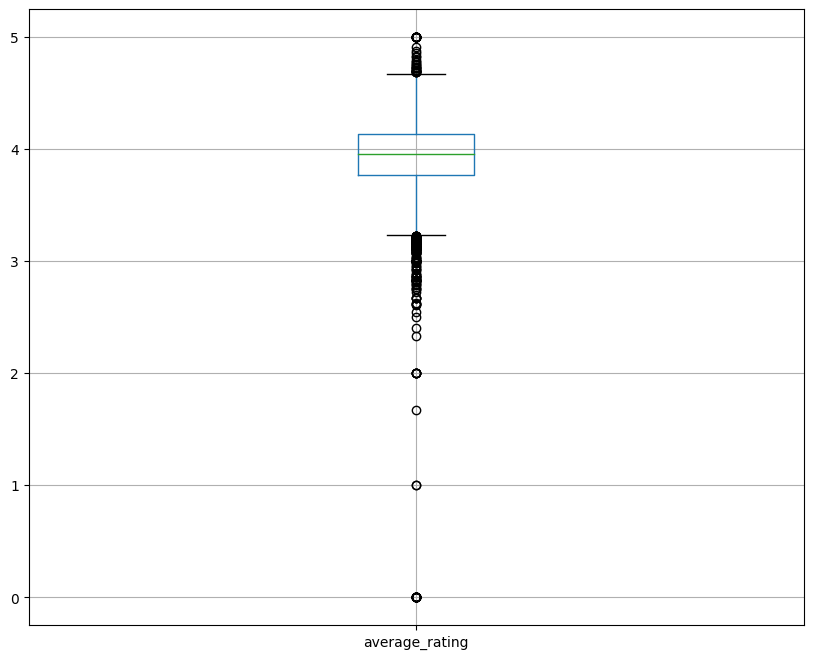

In [61]:
books_df[["average_rating"]].boxplot() 
plt.show()

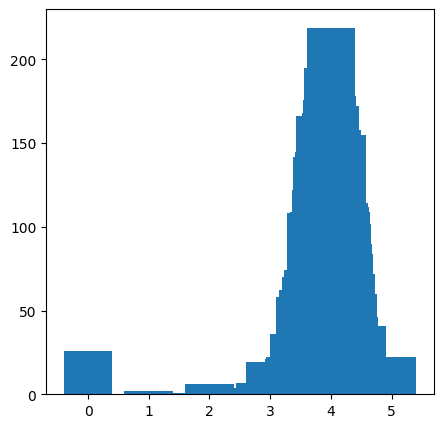

In [62]:
plt.figure(figsize=(5,5))
plt.bar(x=books_df.average_rating.value_counts().index,height=books_df.average_rating.value_counts())
plt.show()

### Pandas Profile Report

In [63]:
from pandas_profiling import ProfileReport

# Generate the profile report with Pandas Profiling
profile = ProfileReport(
    books_df,
    title="Example of summarization of the data"
)

profile.to_notebook_iframe() # pandas_profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Outliers?

In [64]:
books_df.columns

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher'],
      dtype='object')

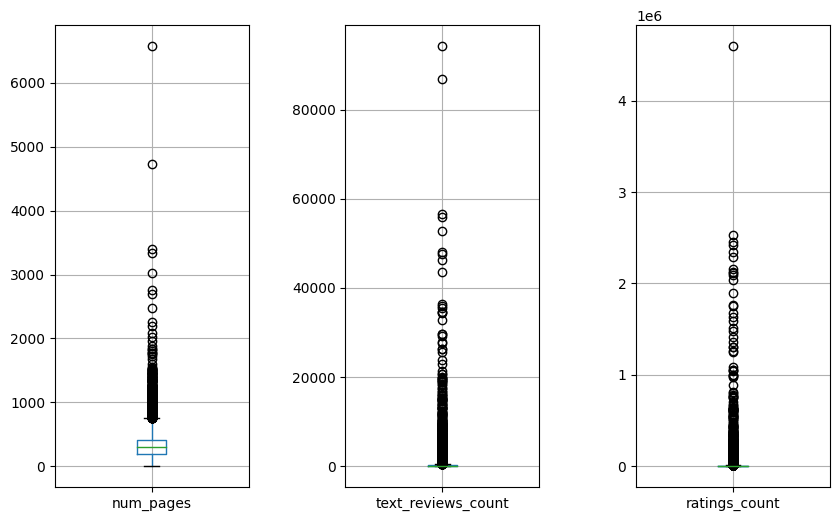

In [65]:
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
books_df.boxplot('num_pages', ax=ax[0])
books_df.boxplot('text_reviews_count', ax=ax[1])
books_df.boxplot('ratings_count', ax=ax[2])
plt.subplots_adjust(wspace=0.5) 
plt.show()

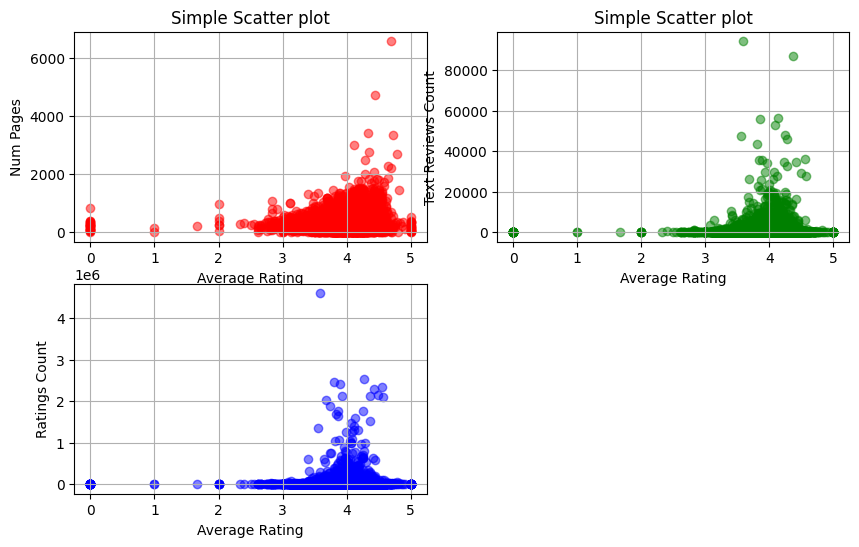

In [66]:
plt.rcParams["figure.figsize"] = (10,6) 

plt.subplot(2,2,1)
# First Scatter plot
plt.scatter(books_df.average_rating, books_df.num_pages, c ="r", alpha=0.5)
plt.title('Simple Scatter plot')
plt.xlabel('Average Rating')
plt.ylabel('Num Pages')
plt.grid()

plt.subplot(2,2,2)
#Second Scatter plot
plt.scatter(books_df.average_rating, books_df.text_reviews_count, c ="g", alpha=0.5)
plt.title('Simple Scatter plot')
plt.xlabel('Average Rating')
plt.ylabel('Text Reviews Count')
plt.grid()

plt.subplot(2,2,3)
#Second Scatter plot
plt.scatter(books_df.average_rating, books_df.ratings_count, c ="b", alpha=0.5)
plt.xlabel('Average Rating')
plt.ylabel('Ratings Count')
plt.grid()

plt.show()


#### Num pages

In [67]:
books_df[books_df.num_pages > 4000]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,039306011X,9780393060119,eng,6576,1338,81,2004-10-17,W. W. Norton Company
25587,The Second World War,Winston S. Churchill/John Keegan,4.45,039541685X,9780395416853,eng,4736,1493,99,1986-05-09,Mariner Books


#### Text review counts

In [68]:
books_df[books_df.text_reviews_count > 80000]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
19063,The Book Thief,Markus Zusak/Cao Xuân Việt Khương,4.37,0375831002,9780375831003,eng,552,1516367,86881,2006-03-14,Alfred A. Knopf
41865,Twilight (Twilight #1),Stephenie Meyer,3.59,0316015849,9780316015844,eng,501,4597666,94265,2006-09-06,Little Brown and Company


#### Ratings count

In [69]:
books_df[books_df.ratings_count > 4000000]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
41865,Twilight (Twilight #1),Stephenie Meyer,3.59,0316015849,9780316015844,eng,501,4597666,94265,2006-09-06,Little Brown and Company


#### Scatter matrix

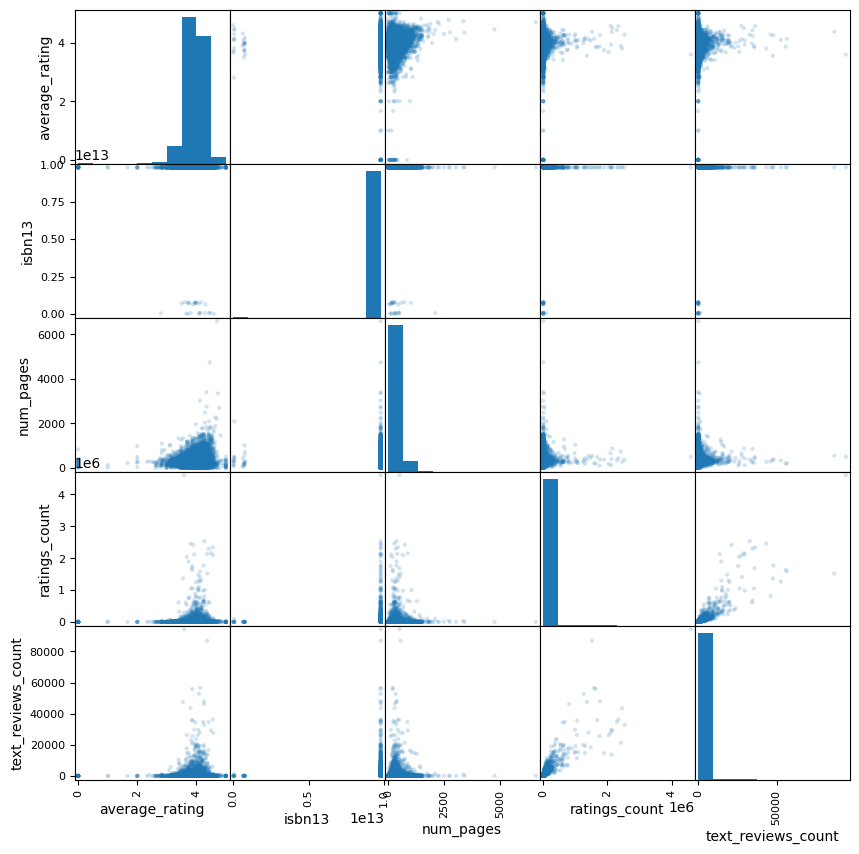

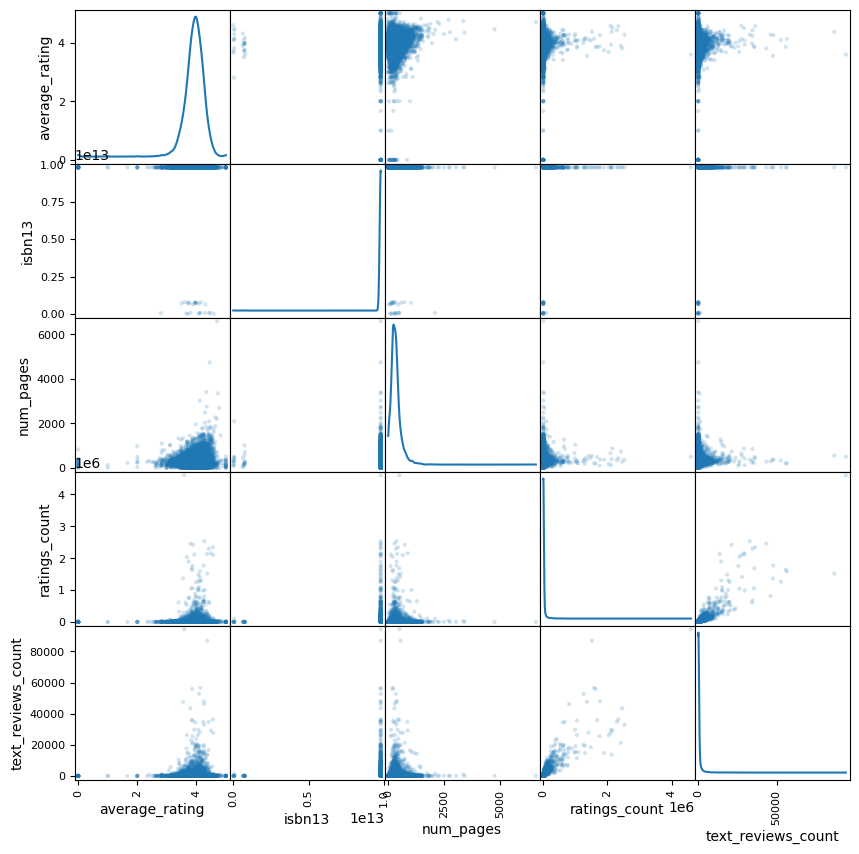

In [70]:
# Visualise covariates two by two
from pandas.plotting import scatter_matrix
scatter_matrix(books_df, alpha=0.2, figsize=(10, 10))

# If you are familiar with PDE, you can estimate each variable distribution with 'kde' method
scatter_matrix(books_df, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

## Removing "outliers" on:

- text reviews count



In [71]:
#books_df = books_df.drop(books_df[books_df.average_rating < 2.5].index)
#books_df.shape

In [72]:
books_df = books_df.drop(books_df[books_df.text_reviews_count > 80000].index)
books_df.shape

(11125, 11)

### Categorical Column: Language Code

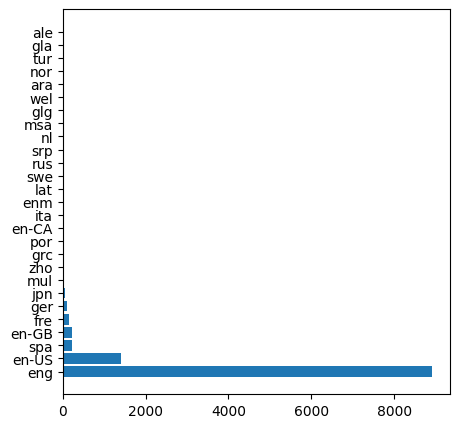

In [73]:
# Language_code column

plt.figure(figsize=(5,5))
plt.barh(y=books_df.language_code.value_counts().index, width=books_df.language_code.value_counts())
plt.show()

## Data Exploratory Analysis Summary

- Data types convertion: Publication_date
- No null values in the dataset
- Average Rating Data is unbalanced: From 0 to 5, data is between 3 and 5
- Removed values over 80000 in text rating count column
- Categorical column: Language code: English 

# Features Engineering

## New columns

Categorical into numerical:

- Publication_date -> Book age


Reduce categorical categories:

- Language_code ->  Lang_codes




Transform Average_Rating into BINS:
- Average_rating -> Average_rating_BINS

In [74]:
books_df.columns

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher'],
      dtype='object')

### Book age

In [75]:
# new column # Book age
books_df['book_age'] = (datetime.now() - books_df['publication_date'])
books_df.book_age = (books_df.book_age.dt.days/365).astype(int)

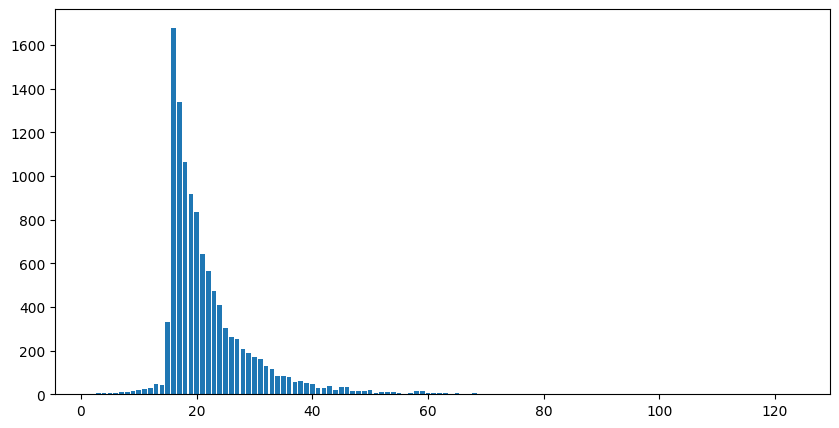

In [76]:
plt.figure(figsize=(10,5))
plt.bar(x=books_df.book_age.value_counts().index,height=books_df.book_age.value_counts())
plt.show()

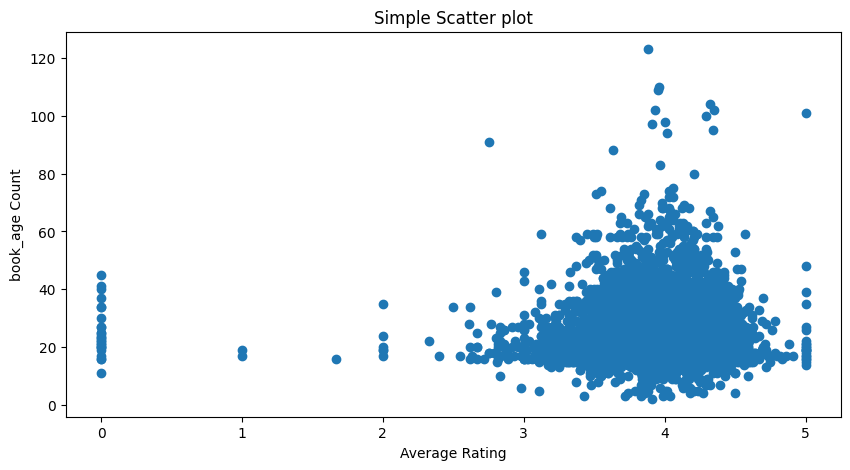

In [77]:
# relation between book age and rating? more years best rating?

x = books_df.average_rating
y = books_df.book_age
plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Simple Scatter plot')
plt.xlabel('Average Rating')
plt.ylabel('book_age Count')
plt.show()

### Lang Code

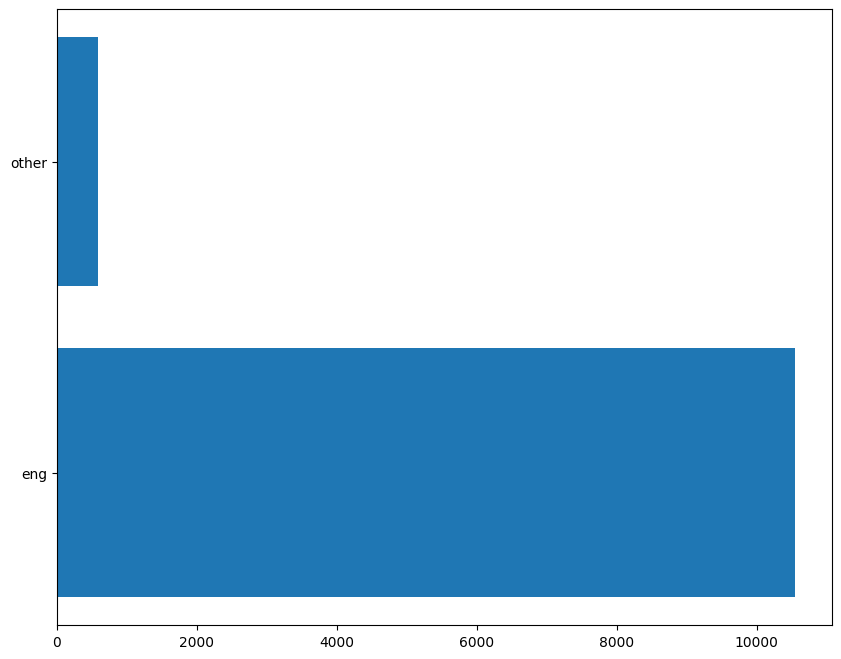

In [78]:
# new column
books_df.language_code.value_counts().index

# convert into 3 categories
lang = {'eng':'eng', 'en-US':'eng', 'spa': 'other', 'en-GB':'eng', 'fre':'other', 'ger':'other', 'jpn':'other', 
  'mul':'other', 'zho':'other', 'grc':'other', 'por':'other', 'en-CA':'eng', 'ita':'other', 'enm':'eng', 
  'lat':'other', 'swe':'other', 'rus':'other', 'srp':'other', 'nl':'other', 'msa':'other', 'glg':'other', 
  'wel':'other', 'ara':'other', 'nor':'other', 'tur':'other', 'gla':'other', 'ale':'other'}

# https://www.w3.org/WAI/ER/IG/ert/iso639.htm

books_df['lang_codes'] = books_df['language_code'].map(lang) # changing the codes
plt.barh(y=books_df.lang_codes.value_counts().index, width=books_df.lang_codes.value_counts())
plt.show()

### Creating more columns

In [79]:
# NEW
books_df['ratings_text_reviews_count'] = (books_df['ratings_count'] * books_df['text_reviews_count'] )
books_df['num_pages_ratings_count'] = (books_df['num_pages'] * books_df['ratings_count'] )
books_df['num_pages_text_reviews_count'] = (books_df['num_pages'] * books_df['text_reviews_count'])
books_df['book_age_text_reviews_count'] = (books_df['book_age'] * books_df['text_reviews_count'])
books_df['book_age_ratings_count'] = (books_df['book_age'] * books_df['ratings_count'])

books_df['ratings_count_div_book_age'] = (books_df['ratings_count'] / books_df['book_age']) 
books_df['text_reviews_count_div_book_age'] = (books_df['text_reviews_count'] / books_df['book_age'])

### Averate rating into BINS 

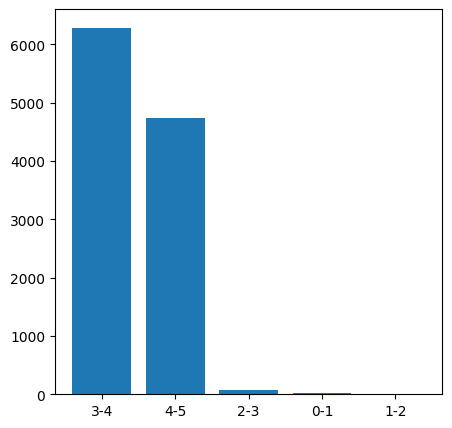

3-4    6287
4-5    4734
2-3      69
0-1      28
1-2       7
Name: average_rating_BINS, dtype: int64

In [80]:
category = pd.cut(books_df.average_rating, bins=[-1,1,2,3,4,5], labels=["0-1", "1-2", "2-3", "3-4", "4-5"])
#books_df.drop('average_rating_BINS', inplace=True, axis=1)
books_df.insert(5,'average_rating_BINS', category)

plt.figure(figsize=(5,5))
plt.bar(x=books_df.average_rating_BINS.value_counts().index,height=books_df.average_rating_BINS.value_counts())
plt.show()
books_df.average_rating_BINS.value_counts()

In [81]:
books_df.columns

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'average_rating_BINS', 'language_code', 'num_pages', 'ratings_count',
       'text_reviews_count', 'publication_date', 'publisher', 'book_age',
       'lang_codes', 'ratings_text_reviews_count', 'num_pages_ratings_count',
       'num_pages_text_reviews_count', 'book_age_text_reviews_count',
       'book_age_ratings_count', 'ratings_count_div_book_age',
       'text_reviews_count_div_book_age'],
      dtype='object')

## Preparing Data for ML 

In [82]:
# Y  average_rating, average_rating_LABELS

books_df = books_df[["num_pages", 
                     "book_age", 
                     "ratings_count", 
                     "text_reviews_count",
                     'lang_codes', 
                     #'ratings_text_reviews_count', 
                     #'num_pages_ratings_count',
                     #'num_pages_text_reviews_count',
                     'ratings_count_div_book_age', 
                     'text_reviews_count_div_book_age',
                     #'book_age_text_reviews_count',
                     #'book_age_ratings_count', 
                     "average_rating", 
                     "average_rating_BINS"]]

books_df.columns

Index(['num_pages', 'book_age', 'ratings_count', 'text_reviews_count',
       'lang_codes', 'ratings_count_div_book_age',
       'text_reviews_count_div_book_age', 'average_rating',
       'average_rating_BINS'],
      dtype='object')

In [83]:
books_df.dtypes

num_pages                             int64
book_age                              int32
ratings_count                         int64
text_reviews_count                    int64
lang_codes                           object
ratings_count_div_book_age          float64
text_reviews_count_div_book_age     float64
average_rating                      float64
average_rating_BINS                category
dtype: object

## Correlation matrix

In [84]:
books_df.corr()

C:\Users\monik\AppData\Local\Temp\ipykernel_19816\2074717246.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  books_df.corr()


,num_pages,book_age,ratings_count,text_reviews_count,ratings_count_div_book_age,text_reviews_count_div_book_age,average_rating
num_pages,1.000000,0.018750,0.033690,0.036315,0.033387,0.033265,0.150795
book_age,0.018750,1.000000,-0.044614,-0.070148,-0.064194,-0.094935,0.028554
ratings_count,0.033690,-0.044614,1.000000,0.858272,0.984570,0.815585,0.044096
text_reviews_count,0.036315,-0.070148,0.858272,1.000000,0.856516,0.976548,0.037586
ratings_count_div_book_age,0.033387,-0.064194,0.984570,0.856516,1.000000,0.845114,0.042645
text_reviews_count_div_book_age,0.033265,-0.094935,0.815585,0.976548,0.845114,1.000000,0.033802
average_rating,0.150795,0.028554,0.044096,0.037586,0.042645,0.033802,1.000000


C:\Users\monik\AppData\Local\Temp\ipykernel_19816\1641821382.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = books_df.corr().round(2)


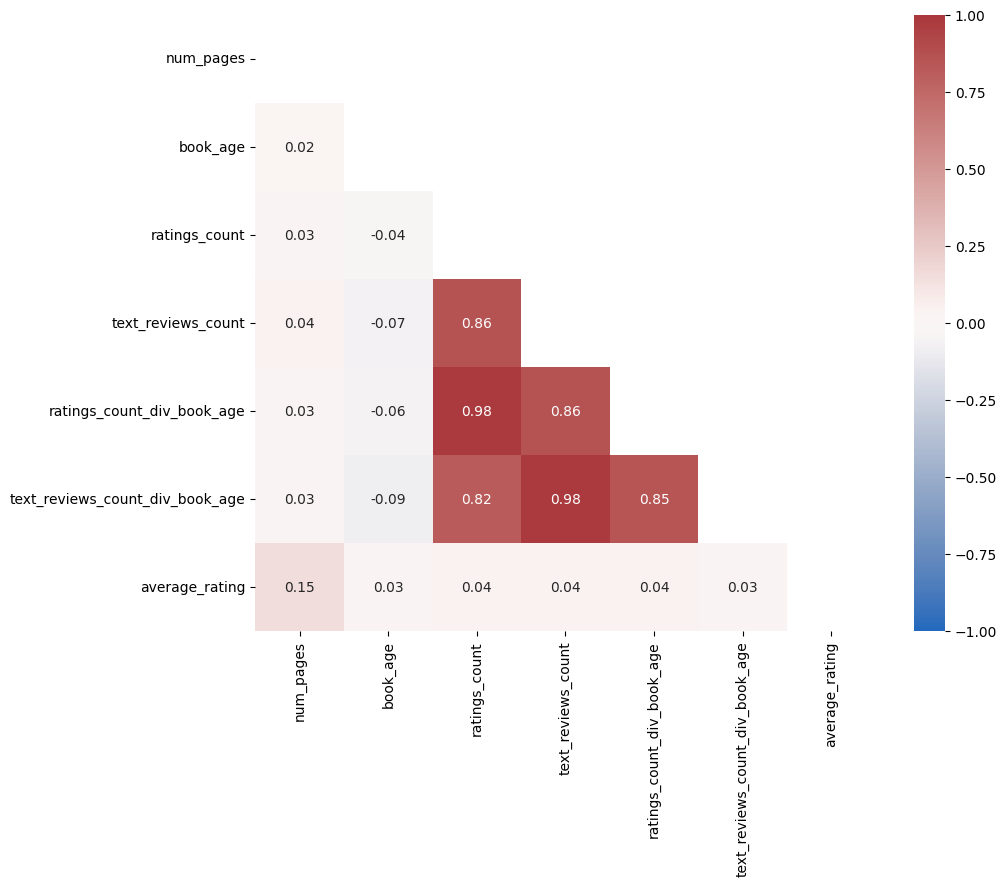

In [85]:
#plt.figure(figsize=(10,10))
matrix = books_df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix,annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

## SMOTE DATA

In [86]:
#!pip install imbalanced-learn

# import imblearn
# from collections import Counter
# from matplotlib import pyplot
# from numpy import where
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

# X = books_df.loc[:,~books_df.columns.isin(["average_rating_BINS"])] 
# y = books_df["average_rating_BINS"]
# counter = Counter(y)
# print(counter)

# strategy = {0:100, 1:100, 2:200, 3:6287, 4:4734}
# oversample = SMOTE(sampling_strategy=strategy)
# X_sampled, y_sampled = oversample.fit_resample(X, y)

# strategy = {0:100, 1:100, 2:200, 3:1000, 4:1000}
# under = RandomUnderSampler(sampling_strategy=strategy, random_state=42) #0.5
# # rus = RandomUnderSampler(random_state=42)
# X_sampled, y_sampled = under.fit_resample(X_sampled, y_sampled)

# plt.figure(figsize=(5,5))
# plt.bar(x=y_sampled.value_counts().index,height=y_sampled.value_counts())
# plt.show()
# y_sampled.value_counts()

In [87]:
# df_sampled = pd.DataFrame({'num_pages': X_sampled.iloc[:, 0], 
#                                'book_age': X_sampled.iloc[:, 1], 
#                                'ratings_count': X_sampled.iloc[:, 2], 
#                                'text_reviews_count': X_sampled.iloc[:, 3], 
#                                'ratings_count_div_book_age': X_sampled.iloc[:, 4], 
#                                'text_reviews_count_div_book_age': X_sampled.iloc[:, 5], 
#                                'average_rating':  X_sampled.iloc[:, 6], 
#                                'average_rating_BINS': y_sampled})

Did not improve results.

# ML Models

In [88]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(books_df,test_size = 0.2) # df_sampled

# get the values of the columns for the training data
X_train = df_train.loc[:,~df_train.columns.isin(["average_rating", "average_rating_BINS"])] 
                                        
y_train = df_train.average_rating
y_train_LABELS = df_train.average_rating_BINS

# get the values of the columns for the test data
X_test = df_test.loc[:, ~df_test.columns.isin(["average_rating", "average_rating_BINS"])]
                                            
y_test = df_test.average_rating
y_test_LABELS = df_test.average_rating_BINS

In [89]:
books_df.isna().sum()

num_pages                          0
book_age                           0
ratings_count                      0
text_reviews_count                 0
lang_codes                         0
ratings_count_div_book_age         0
text_reviews_count_div_book_age    0
average_rating                     0
average_rating_BINS                0
dtype: int64

In [90]:
X_train.describe()

,num_pages,book_age,ratings_count,text_reviews_count,ratings_count_div_book_age,text_reviews_count_div_book_age
count,8900.000000,8900.000000,8.900000e+03,8900.000000,8900.000000,8900.000000
mean,337.069663,22.043146,1.694881e+04,520.426067,894.936356,28.072966
std,236.727395,8.384628,1.024042e+05,2314.558474,5411.138296,128.674871
min,0.000000,3.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,193.000000,17.000000,1.040000e+02,9.000000,4.823529,0.409091
50%,300.000000,20.000000,7.325000e+02,46.000000,35.449495,2.235294
75%,416.000000,24.000000,5.029000e+03,236.000000,248.233660,11.657051
max,4736.000000,123.000000,2.530894e+06,56604.000000,130980.625000,3329.647059


In [91]:
#professor code Ames_House_Pricing.ipynb

from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

# a function for getting all categorical_columns
def get_categorical_columns(df):
    categorical_columns_selector = selector(dtype_include=object)
    categorical_columns = categorical_columns_selector(df)
    return categorical_columns

def get_numerical_columns(df):
    numerical_columns_selector = selector(dtype_exclude=object)
    numerical_columns = numerical_columns_selector(df)
    return numerical_columns


from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# a function for Transformation the data
def my_transformation(df):
    df = df.copy()
    
    numerical_columns = get_numerical_columns(df)
    nominal_columns = get_categorical_columns(df)

    
    numerical_pipeline = Pipeline([('scaler', StandardScaler())])
    nominal_pipeline = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer([
        ('numerical_transformer', numerical_pipeline, numerical_columns),
        ('nominal_transformer', nominal_pipeline, nominal_columns),
    ])
    
    preprocessor.fit(df)
    
    return preprocessor

preprocessor= my_transformation(X_train)
X_train = preprocessor.transform(X_train)

X_test = preprocessor.transform(X_test)
print(X_train.shape) 
print(X_test.shape)

(8900, 8)
(2225, 8)


In [93]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0,max_iter=1000) 
lr_model.fit(X=X_train, y=y_train_LABELS)
lr_y_test_predicted = lr_model.predict(X_test)

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X=X_train,y=y_train_LABELS)
dt_y_test_predicted = dt_model.predict(X_test)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train_LABELS)
rfC_y_test_predicted = rfc.predict(X_test)

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train_LABELS)
svc_y_test_predicted = svc.predict(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train_LABELS)
knn_y_test_predicted = knn.predict(X_test)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train_LABELS)
gnb_y_test_predicted = gnb.predict(X_test)


from sklearn.metrics import classification_report

lr_report =classification_report(y_true=y_test_LABELS, y_pred=lr_y_test_predicted)
dt_report = classification_report(y_true=y_test_LABELS, y_pred=dt_y_test_predicted)
rfC_report = classification_report(y_true=y_test_LABELS, y_pred=rfC_y_test_predicted)
svcC_report = classification_report(y_true=y_test_LABELS, y_pred=svc_y_test_predicted)
knnC_report = classification_report(y_true=y_test_LABELS, y_pred=knn_y_test_predicted)
gnbC_report = classification_report(y_true=y_test_LABELS, y_pred=gnb_y_test_predicted)

print("LR" + lr_report)
print("\nDT " + dt_report)
print("\nRF" + rfC_report)
print("\nSVC" + svcC_report)
print("\nKNN" + knnC_report)
print("\nGNB" + gnbC_report)

# https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501

C:\Users\monik\.conda\envs\GoodReads\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\monik\.conda\envs\GoodReads\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\monik\.conda\envs\GoodReads\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\monik\.con

LR              precision    recall  f1-score   support

         0-1       0.00      0.00      0.00         9
         1-2       0.00      0.00      0.00         1
         2-3       0.00      0.00      0.00        14
         3-4       0.60      0.91      0.72      1267
         4-5       0.62      0.20      0.30       934

    accuracy                           0.60      2225
   macro avg       0.24      0.22      0.21      2225
weighted avg       0.60      0.60      0.54      2225


DT               precision    recall  f1-score   support

         0-1       0.56      0.56      0.56         9
         1-2       0.00      0.00      0.00         1
         2-3       0.14      0.14      0.14        14
         3-4       0.63      0.61      0.62      1267
         4-5       0.49      0.51      0.50       934

    accuracy                           0.56      2225
   macro avg       0.36      0.36      0.36      2225
weighted avg       0.57      0.56      0.57      2225


RF             

C:\Users\monik\.conda\envs\GoodReads\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\monik\.conda\envs\GoodReads\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\monik\.conda\envs\GoodReads\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Best Results


    LogisticRegression 0.60

    RandomForest 0.60
    
    Support Vector Machines 0.61